# 一、业务理解

# 二、 数据准备

1、数据查看---head()查看数据，info()查看类型和缺失值，describe()查看统计情况发现异常值

In [3]:
import pandas as pd
#导入数据源
data_loan=pd.read_csv(r'/Users/Eric/Documents/2019/learning/1_python/对比Excel,轻松学习Python数据分析数据集/loan.csv',
                 encoding="gbk",sep= ",")
#查看各字段数据值
data_loan.head(5)

,用户ID,好坏客户,年龄,负债率,月收入,家属数量
0,1,1,45,0.802982,9120.0,2.0
1,2,0,40,0.121876,2600.0,1.0
2,3,0,38,0.085113,3042.0,0.0
3,4,0,30,0.036050,3300.0,0.0
4,5,0,49,0.024926,63588.0,0.0


In [4]:
#查看各字段数据类型及缺失值
data_loan.info()   #可以看到月收入和家属数量字段有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [5]:
#查看各字段统计分布情况
data_loan.describe()   
#可以看到负债率有个极大的异常值；e+03表示10的3次方，也就是月收入25%数是3400

,用户ID,好坏客户,年龄,负债率,月收入,家属数量
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,146076.000000
mean,75000.500000,0.066840,52.295207,353.005076,6.670221e+03,0.757222
std,43301.414527,0.249746,14.771866,2037.818523,1.438467e+04,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,37500.750000,0.000000,41.000000,0.175074,3.400000e+03,0.000000
50%,75000.500000,0.000000,52.000000,0.366508,5.400000e+03,0.000000
75%,112500.250000,0.000000,63.000000,0.868254,8.249000e+03,1.000000
max,150000.000000,1.000000,109.000000,329664.000000,3.008750e+06,20.000000


2、数据预处理---缺失值、重复值、异常值、数据类型转换、索引设置

In [6]:
#1）缺失值处理-删除df.dropna()/df.dropna(how='all') ，填充df.fillna({'‘col':df['col'].mean()})
#月收入缺失较多，用均值填充处理；家属数量缺失较少，可以均值填充也可以删除处理
data_loan2=data_loan.fillna({"月收入":data_loan["月收入"].mean()})
data_loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [7]:
#2）重复值处理---确定重复值原则，全部列重复还是某几列重复-按全部列统计重复值df.duplicated().sum()
data_loan2.duplicated().sum()   #按全部列统计重复值

0

In [8]:
data_loan2.duplicated(subset='用户ID').sum()  #按用户ID列统计重复值

0

In [9]:
#3）异常值处理---通过data.describe()和绘制箱形图或直方图查看数据分布发现异常值---感觉还是data.describe()好用
#导入库
import matplotlib as mpl
import matplotlib.pyplot as plt 
#让图表直接在Jupyter Notebook中展示出来
%matplotlib inline  
#解决windows电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
#解决mac电脑中文乱码问题
mpl.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
#解决负号无法正常显示的问题
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format='svg' #解决默认设置下matplotlib做出来的图表不清晰的问题，将图表设置成矢量图格式
plt.figure(figsize=(8,6)) #建立宽为8高为6的画布， figsize参数用来设置参数

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

负债率有几个非常大的异常值，可以结合实际业务情况对这些异常值进行处理

4)索引设置数据类型的修改暂时不需要

# 三、数据分析

### 1、是不是收入越高的人坏账率越低？---指标：收入与坏账率的关系；思路：收入与坏账率的散点图和直方图

In [11]:
#cut方法
cut_bins=[0,5000,10000,15000,20000,100000]
data_loan2['income_cut']=pd.cut(data_loan2['月收入'],bins=cut_bins)
data_loan2.head(10)

,用户ID,好坏客户,年龄,负债率,月收入,家属数量,income_cut
0,1,1,45,0.802982,9120.000000,2.0,"(5000, 10000]"
1,2,0,40,0.121876,2600.000000,1.0,"(0, 5000]"
2,3,0,38,0.085113,3042.000000,0.0,"(0, 5000]"
3,4,0,30,0.036050,3300.000000,0.0,"(0, 5000]"
4,5,0,49,0.024926,63588.000000,0.0,"(20000, 100000]"
5,6,0,74,0.375607,3500.000000,1.0,"(0, 5000]"
6,7,0,57,5710.000000,6670.221237,0.0,"(5000, 10000]"
7,8,0,39,0.209940,3500.000000,0.0,"(0, 5000]"
8,9,0,27,46.000000,6670.221237,NaN,"(5000, 10000]"
9,10,0,57,0.606291,23684.000000,2.0,"(20000, 100000]"


In [46]:
#按收入区间分组计算坏客户数
bad=data_loan2.groupby('income_cut')['好坏客户'].sum()
bad_table=bad.reset_index()
#按收入区间分组计算总客户数
total=data_loan2.groupby('income_cut')['好坏客户'].count()
total_table=total.reset_index()
#坏账率
bad_rate=bad/total
bad_rate_table=bad_rate.reset_index()
#坏账率情况表-多表拼接-python中是用pd.merge(df1,df2)实现
df_rate=pd.merge(pd.merge(bad_table,total_table,on='income_cut',suffixes=['_坏客户数','_总客户数']),bad_rate_table,on='income_cut')
df_rate.rename(columns={'好坏客户_坏客户数':'坏客户数', '好坏客户_总客户数':'总客户数', '好坏客户':'坏账率'}, inplace = True)
df_rate

,income_cut,坏客户数,总客户数,坏账率
0,"(0, 5000]",4747,54225,0.087543
1,"(5000, 10000]",4421,75822,0.058308
2,"(10000, 15000]",547,13035,0.041964
3,"(15000, 20000]",133,3181,0.041811
4,"(20000, 100000]",109,2033,0.053615


Text(0, 0.5, '坏账率')

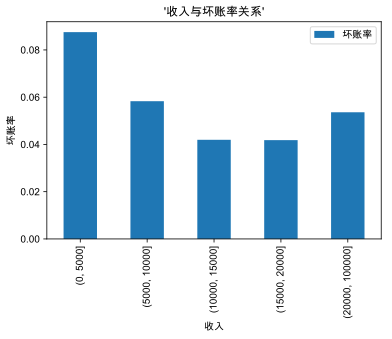

In [70]:
#画图函数：DataFrame.plot.bar(x=None, y=None, **kwds)[source],
#官方文档http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
df_rate.plot.bar(x='income_cut',y='坏账率')
#图表设置
plt.title("'收入与坏账率关系'",loc='center')   #设置标题
#for a,b in zip(x,y):
    #plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('收入')   #设置x轴名称
plt.ylabel('坏账率')   #设置y轴名称

### 2、年龄与坏账率的关系------指标：年龄与坏账率的关系；思路：年龄与坏账率的散点图和直方图

In [78]:
#qcut方法
data_loan2['age_cut']=pd.qcut(data_loan2['年龄'],5)
data_loan2.head(10)

,用户ID,好坏客户,年龄,负债率,月收入,家属数量,income_cut,age_cut
0,1,1,45,0.802982,9120.000000,2.0,"(5000, 10000]","(39.0, 48.0]"
1,2,0,40,0.121876,2600.000000,1.0,"(0, 5000]","(39.0, 48.0]"
2,3,0,38,0.085113,3042.000000,0.0,"(0, 5000]","(-0.001, 39.0]"
3,4,0,30,0.036050,3300.000000,0.0,"(0, 5000]","(-0.001, 39.0]"
4,5,0,49,0.024926,63588.000000,0.0,"(20000, 100000]","(48.0, 56.0]"
5,6,0,74,0.375607,3500.000000,1.0,"(0, 5000]","(65.0, 109.0]"
6,7,0,57,5710.000000,6670.221237,0.0,"(5000, 10000]","(56.0, 65.0]"
7,8,0,39,0.209940,3500.000000,0.0,"(0, 5000]","(-0.001, 39.0]"
8,9,0,27,46.000000,6670.221237,NaN,"(5000, 10000]","(-0.001, 39.0]"
9,10,0,57,0.606291,23684.000000,2.0,"(20000, 100000]","(56.0, 65.0]"


In [79]:
#按年龄区间分组计算坏客户数
bad_age=data_loan2.groupby('age_cut')['好坏客户'].sum()
bad_age_table=bad_age.reset_index()
#按年龄区间分组计算总客户数
total_age=data_loan2.groupby('age_cut')['好坏客户'].count()
total_age_table=total_age.reset_index()
#坏账率
bad_rate_age=bad_age/total_age
bad_rate_table_age=bad_rate_age.reset_index()
#坏账率情况表-多表拼接-python中是用pd.merge(df1,df2)实现
df_rate_age=pd.merge(pd.merge(bad_age_table,total_age_table,on='age_cut',suffixes=['_坏客户数','_总客户数']),bad_rate_table_age,on='age_cut')
df_rate_age.rename(columns={'好坏客户_坏客户数':'坏客户数', '好坏客户_总客户数':'总客户数', '好坏客户':'坏账率'}, inplace = True)
df_rate_age

,age_cut,坏客户数,总客户数,坏账率
0,"(-0.001, 39.0]",3370,32004,0.105299
1,"(39.0, 48.0]",2565,30540,0.083988
2,"(48.0, 56.0]",2077,29040,0.071522
3,"(56.0, 65.0]",1324,29817,0.044404
4,"(65.0, 109.0]",690,28599,0.024127


Text(0, 0.5, '坏账率')

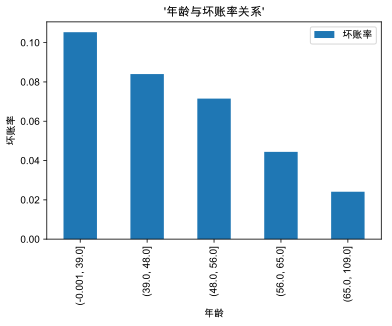

In [80]:
#画图函数：DataFrame.plot.bar(x=None, y=None, **kwds)[source],
#官方文档http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
df_rate_age.plot.bar(x='age_cut',y='坏账率')
#图表设置
plt.title("'年龄与坏账率关系'",loc='center')   #设置标题
#for a,b in zip(x,y):
    #plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('年龄')   #设置x轴名称
plt.ylabel('坏账率')   #设置y轴名称

### 3、家属数量与坏账率有什么关系？---指标：家属数量与坏账率的关系；思路：家属数量与坏账率的散点图和直方图

家属数量有大概3000多条缺失值，这里考虑到数据的真实性，暂不处理缺失值；
家属数量的四分位数是0，0，1，最小嘴大值是0和20；由于其范围较小，直接当作离散值处理，不做区间切分。

In [81]:
#按家属数量分组计算坏客户数
bad_num=data_loan2.groupby('家属数量')['好坏客户'].sum()
bad_num_table=bad_num.reset_index()
#按家属数量分组计算总客户数
total_num=data_loan2.groupby('家属数量')['好坏客户'].count()
total_num_table=total_num.reset_index()
#坏账率
bad_rate_num=bad_num/total_num
bad_rate_table_num=bad_rate_num.reset_index()
#坏账率情况表-多表拼接-python中是用pd.merge(df1,df2)实现
df_rate_num=pd.merge(pd.merge(bad_num_table,total_num_table,on='家属数量',suffixes=['_坏客户数','_总客户数']),bad_rate_table_num,on='家属数量')
df_rate_num.rename(columns={'好坏客户_坏客户数':'坏客户数', '好坏客户_总客户数':'总客户数', '好坏客户':'坏账率'}, inplace = True)
df_rate_num

,家属数量,坏客户数,总客户数,坏账率
0,0.0,5095,86902,0.058629
1,1.0,1935,26316,0.073529
2,2.0,1584,19522,0.081139
3,3.0,837,9483,0.088263
4,4.0,297,2862,0.103774
5,5.0,68,746,0.091153
6,6.0,24,158,0.151899
7,7.0,5,51,0.098039
8,8.0,2,24,0.083333
9,9.0,0,5,0.000000


Text(0, 0.5, '坏账率')

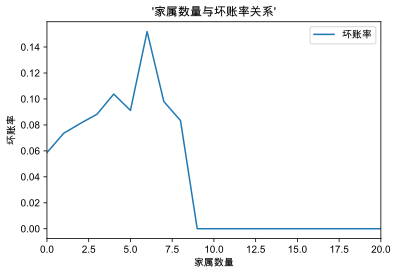

In [83]:
#画图函数：DataFrame.plot.(x=None, y=None, **kwds)[source],
#官方文档http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
df_rate_num.plot(x='家属数量',y='坏账率')
#图表设置
plt.title("'家属数量与坏账率关系'",loc='center')   #设置标题
#for a,b in zip(x,y):
    #plt.text(a,b,b,ha='center',va='bottom',fontsize=10)   #设置数据标签
#plt.grid(True)   #设置网格线
plt.legend()   #设置图例，调用显示出plot中的label值
plt.xlabel('家属数量')   #设置x轴名称
plt.ylabel('坏账率')   #设置y轴名称